# EDA - Aula prática 07/07

Tópicos estudados:
- Bubblesort
- Select K

In [3]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

## BubbleSort

Código implementado baseado no pseudocódigo do homework 1.

In [1]:
def bubblesort(A):
    for i in range(len(A)):
        for j in range(len(A) - 1, i, -1):
            if A[j] < A[j - 1]:
                # Método para fazer "exchange" entre duas posições da lista
                A[j], A[j - 1] = A[j - 1], A[j]
    return A

In [5]:
def is_sorted(A):
    """
    Função que verifica se a lista está ordenada
    sorted(A) retorna uma cópia ordenada de A
    Essa função não altera a lista A    
    """
    return A == sorted(A)

In [4]:
# np.random é o pacote para gerar amostras aleatórias, calcular probabilidades
# Vamos gerar uma lista de 20 elementos, com inteiros aleatórios de 0 a 10000
# Vai retornar um np.array e vamos converter para list
A = np.random.randint(0, 10000, size = 20).tolist()

In [6]:
is_sorted(bubblesort(A))

True

Vamos verificar o tempo computacional desse algoritmo.

In [8]:
sizes = [100, 500, 1000, 5000, 10000]
times = []
for size in sizes:
    A = np.random.randint(0, 1000000, size = size).tolist()
    start = time()
    bubblesort(A)
    end = time()
    times.append(end - start)

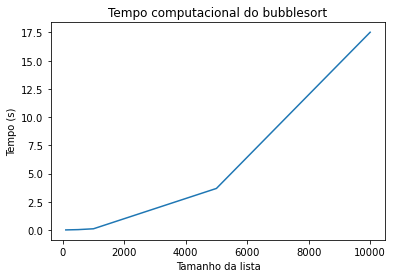

In [9]:
plt.plot(sizes, times)
plt.title("Tempo computacional do bubblesort")
plt.xlabel("Tamanho da lista")
plt.ylabel("Tempo (s)")
plt.show()

## Select k

Códigos baseados nos slides da L6 no Eclass.

O algoritmo *select k* recebe uma lista A e um inteiro k e retorna o k-ésimo menor elemento em A.

In [156]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
 
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
# l is for left index and r is right index of the
# sub-array of arr to be sorted
 
 
def mergesort(arr, l, r):
    if l < r:
 
        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2
 
        # Sort first and second halves
        mergesort(arr, l, m)
        mergesort(arr, m+1, r)
        merge(arr, l, m, r)
 

In [167]:
def our_sort(A):
    """
    A função select k vai utilizar um sort, podemos utilizar diferentes sorts.
    Vamos deixar o sort padrão do Python por enquanto.
    """
    #return bubblesort(A)
    B = A.copy()
    mergesort(B, 0, len(B) - 1)
    return B
    #return mergesort(A)
    #return sorted(A)

Uma maneira simples de obter o k-ésimo menor, é ordenar a lista inteira e retornar o elemento da posição k.

In [168]:
def select_k_naive(A, k):
    return mergesort(A)[k]

Uma outra maneira, é com o paradigma *Divide and conquer*, vamos dividir o problema em problemas menores. O problema inicial era obter o k-ésimo na lista A, e o problema "menor" será obter o k-ésimo em uma lista menor do que A.

Para isso, iremos separar a lista em duas partes, e verificar em qual das partes o k-ésimo menor provavelmente está.

In [169]:
def partition(A, p):
    """
    Função que recebe uma lista A e um índice p
    Cria a lista L de elementos menores ou iguais a A[p]
    Cria a lista R de elementos maiores que A[p]
    """
    L, R = [], []
    for i in range(len(A)):
        if i == p:
            continue
        elif A[i] <= A[p]:
            L.append(A[i])
        else:
            R.append(A[i])
    
    return L, A[p], R

Separando a lista em posições aleatórias.

In [170]:
def random_choose_pivot(A):
    """
    Recebe uma lista A e retorna um inteiro aleatório entre 0 e len(A) - 1 (incluindo)
    """
    return np.random.randint(0, len(A)) 

In [171]:
def select_k_random(A, k):
    """
    Separa a lista A em uma posição aleatória.
    E verifica em quais dos dois "lados" o k-menor estará.
    """
    if len(A) == 1:
        return A[0]
    
    p = random_choose_pivot(A)
    L, A_p, R = partition(A, p)

    if len(L) == k:
        return A_p
    elif len(L) > k:
        return select_k_random(L, k)
    else:
        return select_k_random(R, k - len(L) - 1)

Uma maneira de melhorar isso é separando em uma posição que não seja aleatória, que seja praticamente no "meio" de A para ter a garantia de que o problema "menor" vai ser perto de metade do problema original.

Essa maneira vai ser dividindo através da aproximação da mediana, a "mediana das medianas".

In [172]:
def smartly_choose_pivot(A):
    """
    Separa a lista A em listas menores de tamanho no máximo 5
    E encontra a mediana dessa lista usando o select_k
    Depois encontra a mediana das medianas
    Por fim, A.index(A_p) retorna o índice do elemento A_p em A
    """
    m = len(A) // 5
    candidate_pivots = []
    for i in range(m):
        A_g = A[i*5 : (i+1) * 5]
        p_i = select_k(A_g, 2)
        candidate_pivots.append(p_i)
    
    if m * 5 < len(A):
        A_g = A[m*5 :]
        p_i = select_k(A_g, len(A_g)//2)
        candidate_pivots.append(p_i)
        
    A_p = select_k(candidate_pivots, m//2)
    return A.index(A_p)

In [173]:
def select_k(A, k):
    """
    Select k com a divisão eficiente.
    """
    if len(A) < 100:
        return select_k_naive(A, k)

    p = smartly_choose_pivot(A)
    L, A_p, R = partition(A, p)
    if len(L) == k:
        return A[p]
    elif len(L) > k:
        return select_k(L, k)
    else:
        return select_k(R, k - len(L) - 1)

Comparação com as diferentes versões da select k:

- *naive*: ordena e retorna o k-ésimo
- *random*: separa de forma aleatória
- *smart*: ordena de forma "eficiente"

In [174]:
def run_tests(n_tests = 5, size = 1000):
    naive_times = []
    random_times = []
    smart_times = []
    for k in range(n_tests):
        A = np.random.randint(0, 100000, size = size).tolist()
        k = int(np.random.randint(0, size))

        start = time()
        naive_solution = select_k_naive(A, k)
        naive_times.append(time() - start)

        start = time()
        random_solution = select_k_random(A, k)
        random_times.append(time() - start)
        
        start = time()
        smart_solution = select_k(A, k)
        smart_times.append(time() - start)
        
        # Verifica se as soluções são iguais
        assert naive_solution == random_solution
        assert naive_solution == smart_solution
    
    return np.mean(naive_times), np.mean(random_times), np.mean(smart_times)

In [175]:
def plot_times(n_tests = 5, sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]):
    naive_times = []
    random_times = []
    smart_times = []
    for size in sizes:
        n, r, s = run_tests(n_tests, size)
        naive_times.append(n)
        random_times.append(r)
        smart_times.append(s)

    plt.plot(sizes, naive_times, label = 'naive')
    plt.plot(sizes, random_times, label = 'random')
    plt.plot(sizes, smart_times, label = 'smart')
    plt.legend()
    plt.show()

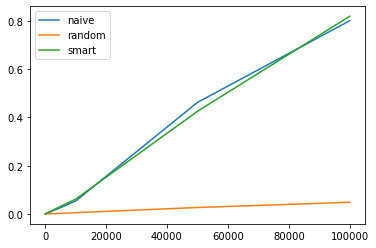

In [176]:
plot_times()

Ué, mas a versão que deveria ser melhor, foi mais lento, o que ocorreu?

Aqui acontece que apesar do resultado teórico, as funções de `append`, `index`, recursões, acabam tornando o código menos eficiente do que apenas utilizar a função `sorted` que foi implementada e otimizada em C.

In [126]:
def partition_numpy(A, p):
    A_p = A[p]
    A_ = np.concatenate([A[:p], A[p+1:]])
    return np.where(A_ <= A_p)[0], A_p, np.where(A_ > A_p)[0]    

In [127]:
def smartly_choose_pivot_numpy(A):
    m = len(A) // 5
    if m * 5 < len(A):
        candidate_pivots = np.zeros(m + 1)
    else:
        candidate_pivots = np.zeros(m)

    for i in range(m):
        candidate_pivots[i] = np.median(A[i*5 : (i+1) * 5])
    
    if m * 5 < len(A):
        candidate_pivots[-1] = select_k_naive(A[m*5 :], (len(A) - m*5)//2)
    
    
    A_p = select_k_naive(candidate_pivots, len(candidate_pivots)//2)
    # Encontra o indice do "bucket" i que tá o pivo
    i = np.where(candidate_pivots == A_p)[0][0]
    return np.where(A[i*5: (i + 1 ) * 5] == A_p)[0][0]

In [128]:
%%timeit
np.partition(A, k)[k]

5.64 µs ± 56.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [129]:
def select_k_while(A, k):
    """
    Select k com a divisão eficiente.
    """
    k_ = k
    A_ = A
    while len(A_) > 100:
        p = smartly_choose_pivot_numpy(A_)
        L, A_p, R = partition_numpy(A_, p)

        if len(L) == k_:
            return A_p
        elif len(L) > k_:
            A_ = L
        else:
            A_ = R
            k_ = k_ - len(L) - 1
    
    return np.sort(A_)[k_]

In [130]:
%%timeit
select_k(A_, k)

984 µs ± 289 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [131]:
%%timeit
select_k_while(A, k)

8.98 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
